In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Load the dataset
df = pd.read_csv('data_file.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check data types and missing values
print("\nData types and non-null counts:")
print(df.info())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Dataset shape: (20640, 10)

First 5 rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         496         177         7.2574              352100        NEAR BAY  
3         558         219         5.6431              341300        NEAR BAY  
4         565         259         3.8462              342200        NEAR BAY  

Data types and no

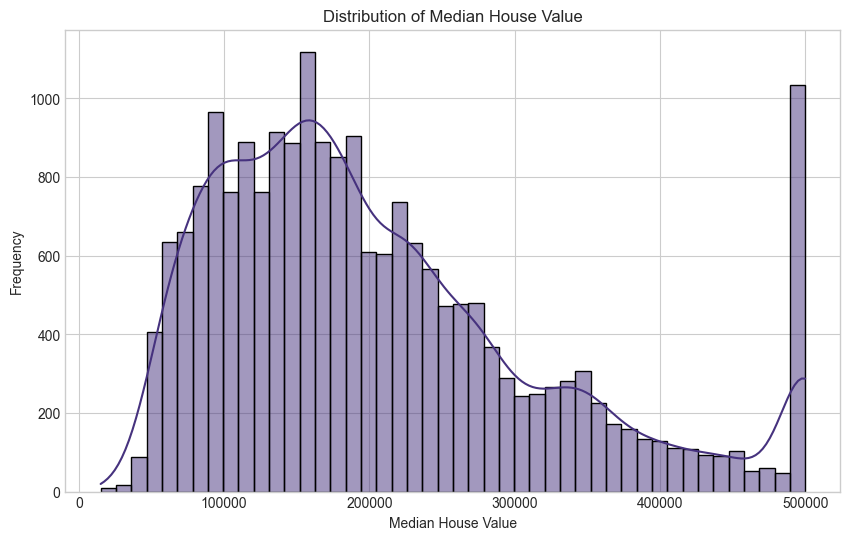

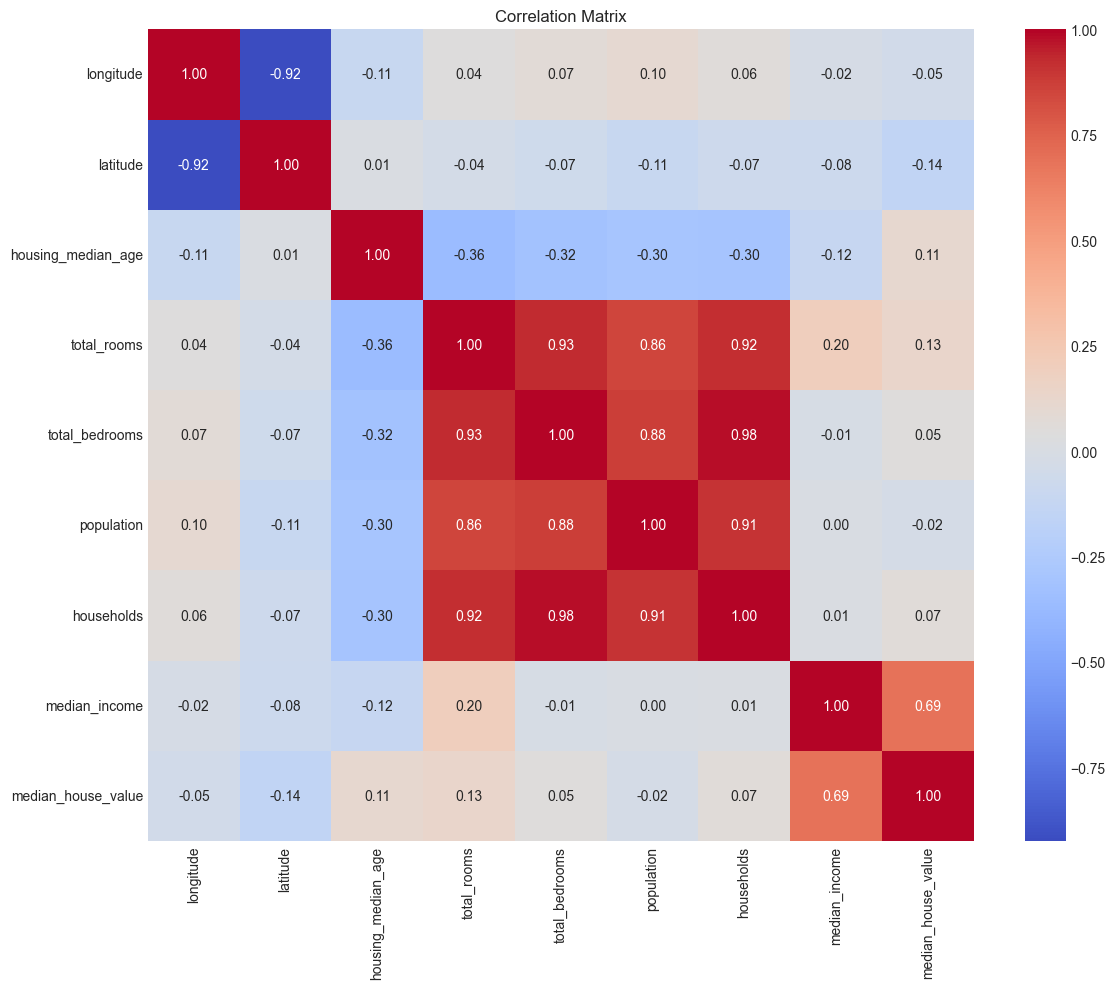

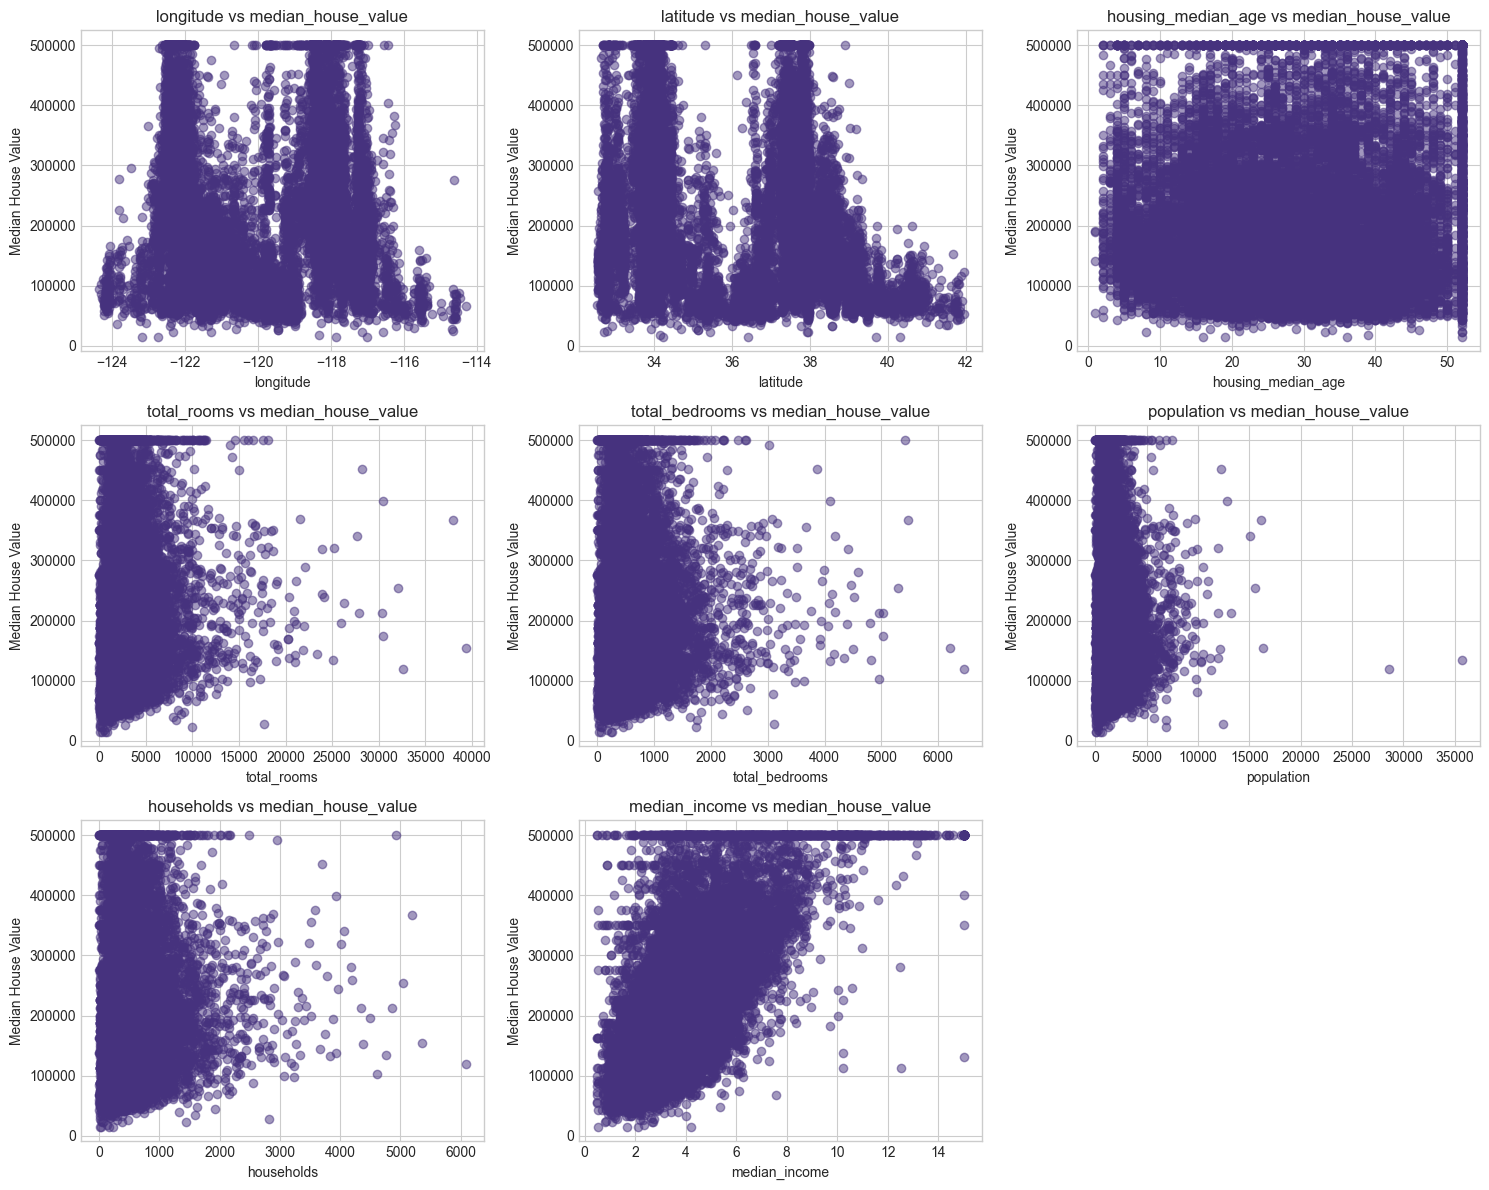

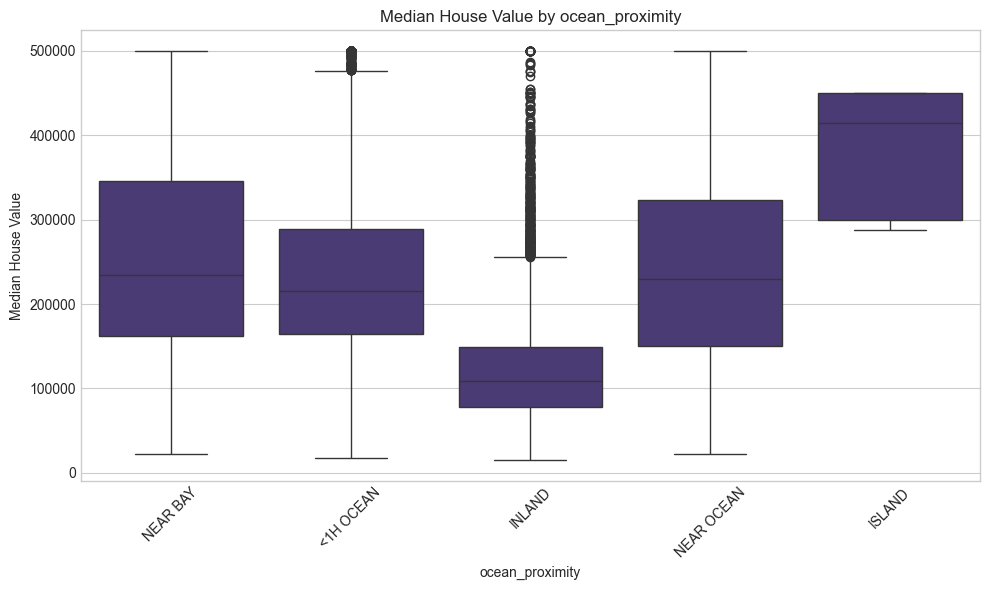

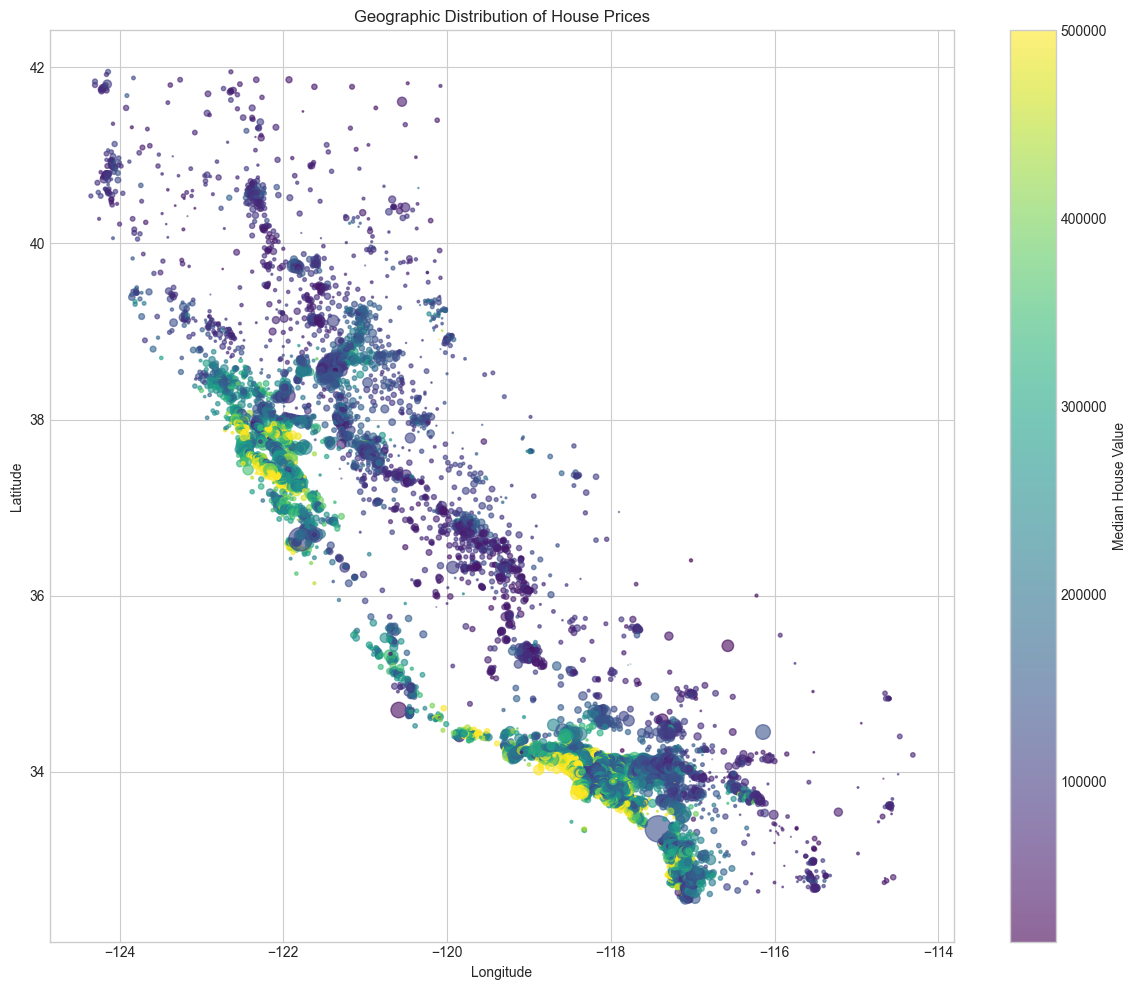

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix to identify relationships between variables
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Scatter plots to visualize relationships with the target variable
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_features.remove('median_house_value')  # Remove target variable

plt.figure(figsize=(15, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[feature], df['median_house_value'], alpha=0.5)
    plt.title(f'{feature} vs median_house_value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
plt.tight_layout()
plt.show()

# Check for categorical variables and visualize them
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='median_house_value', data=df)
    plt.title(f'Median House Value by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Geographic visualization if latitude and longitude are available
plt.figure(figsize=(12, 10))
scatter = plt.scatter(df['longitude'], df['latitude'], 
                     c=df['median_house_value'], cmap='viridis', 
                     s=df['population']/100, alpha=0.6)
plt.colorbar(scatter, label='Median House Value')
plt.title('Geographic Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


Filling missing values in total_bedrooms with median


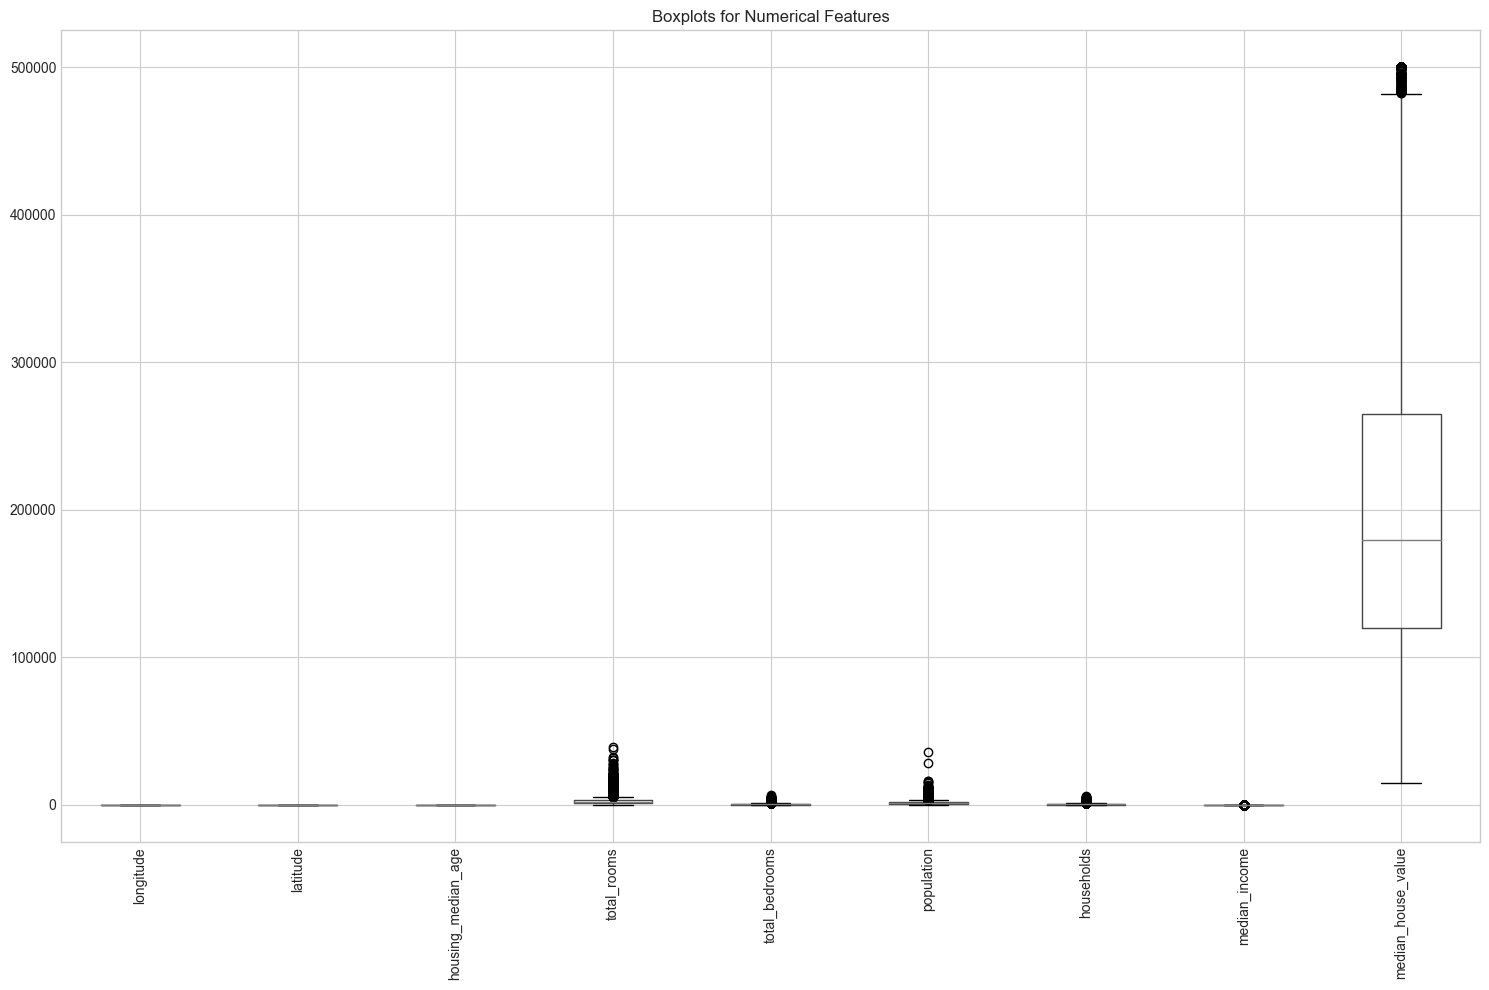


Creating additional features...

Data split into training set (16512 samples) and test set (4128 samples)


In [3]:
# Handle missing values if any
if df.isnull().sum().sum() > 0:
    # Fill numeric columns with median
    numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    for feature in numeric_features:
        if df[feature].isnull().sum() > 0:
            print(f"Filling missing values in {feature} with median")
            df[feature].fillna(df[feature].median(), inplace=True)
    
    # Fill categorical columns with mode
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    for feature in categorical_features:
        if df[feature].isnull().sum() > 0:
            print(f"Filling missing values in {feature} with mode")
            df[feature].fillna(df[feature].mode()[0], inplace=True)

# Check for outliers using boxplots
plt.figure(figsize=(15, 10))
df.boxplot(numeric_features)
plt.title('Boxplots for Numerical Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Feature engineering
print("\nCreating additional features...")
# Rooms per household
df['rooms_per_household'] = df['total_rooms'] / df['households']
# Bedrooms ratio
df['bedrooms_ratio'] = df['total_bedrooms'] / df['total_rooms']
# Population density
df['population_per_household'] = df['population'] / df['households']

# Separate features and target variable
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Identify numerical and categorical columns
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nData split into training set ({X_train.shape[0]} samples) and test set ({X_test.shape[0]} samples)")

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create transformer for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


The most correlated feature with median_house_value is: median_income with correlation coefficient: 0.6881

Simple Linear Regression Model Evaluation:
Feature used: median_income
Coefficient: 41933.8494
Intercept: 44459.7292

Training set metrics:
MSE: 6991447170.18
RMSE: 83614.87
R²: 0.4770

Test set metrics:
MSE: 7091157771.77
RMSE: 84209.01
R²: 0.4589


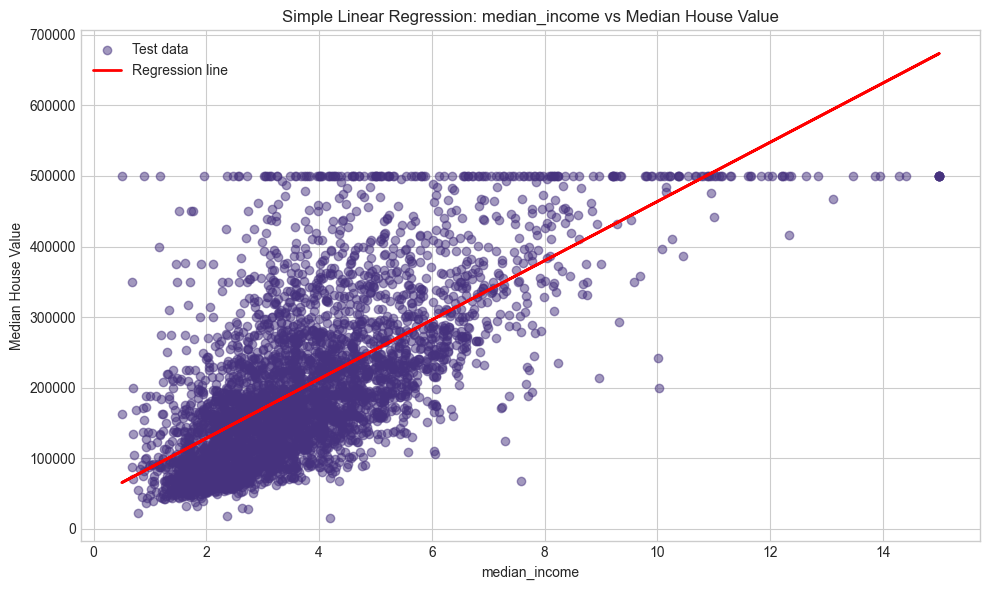

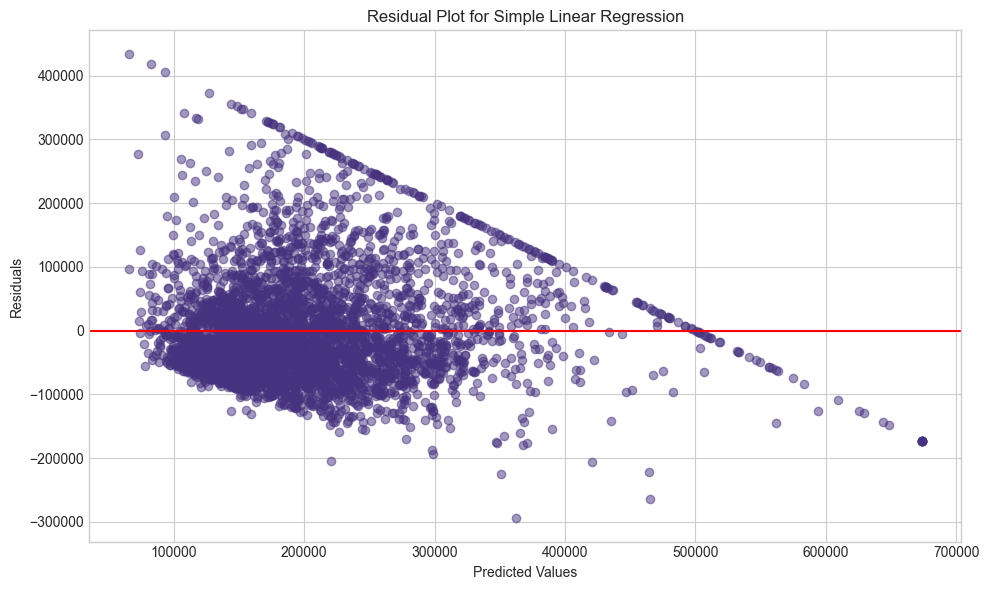

In [4]:
# Identify the most correlated feature with the target variable
correlations = numeric_df.corr()['median_house_value'].drop('median_house_value')
most_correlated_feature = correlations.abs().idxmax()
print(f"\nThe most correlated feature with median_house_value is: {most_correlated_feature} "
      f"with correlation coefficient: {correlations[most_correlated_feature]:.4f}")

# Simple Linear Regression with the most correlated feature
X_simple = X_train[[most_correlated_feature]]
X_test_simple = X_test[[most_correlated_feature]]

# Create and train the simple linear regression model
simple_model = LinearRegression()
simple_model.fit(X_simple, y_train)

# Make predictions on training and test sets
y_train_pred_simple = simple_model.predict(X_simple)
y_test_pred_simple = simple_model.predict(X_test_simple)

# Evaluate the simple linear regression model
train_mse_simple = mean_squared_error(y_train, y_train_pred_simple)
train_rmse_simple = np.sqrt(train_mse_simple)
train_r2_simple = r2_score(y_train, y_train_pred_simple)

test_mse_simple = mean_squared_error(y_test, y_test_pred_simple)
test_rmse_simple = np.sqrt(test_mse_simple)
test_r2_simple = r2_score(y_test, y_test_pred_simple)

print("\nSimple Linear Regression Model Evaluation:")
print(f"Feature used: {most_correlated_feature}")
print(f"Coefficient: {simple_model.coef_[0]:.4f}")
print(f"Intercept: {simple_model.intercept_:.4f}")
print("\nTraining set metrics:")
print(f"MSE: {train_mse_simple:.2f}")
print(f"RMSE: {train_rmse_simple:.2f}")
print(f"R²: {train_r2_simple:.4f}")
print("\nTest set metrics:")
print(f"MSE: {test_mse_simple:.2f}")
print(f"RMSE: {test_rmse_simple:.2f}")
print(f"R²: {test_r2_simple:.4f}")

# Visualize the simple linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test, alpha=0.5, label='Test data')
plt.plot(X_test_simple, y_test_pred_simple, color='red', linewidth=2, label='Regression line')
plt.title(f'Simple Linear Regression: {most_correlated_feature} vs Median House Value')
plt.xlabel(most_correlated_feature)
plt.ylabel('Median House Value')
plt.legend()
plt.tight_layout()
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_test_pred_simple
plt.scatter(y_test_pred_simple, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Residual Plot for Simple Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()


Multiple Linear Regression Model Evaluation:

Training set metrics:
MSE: 4569681269.07
RMSE: 67599.42
R²: 0.6582

Test set metrics:
MSE: 5284605325.83
RMSE: 72695.29
R²: 0.5967


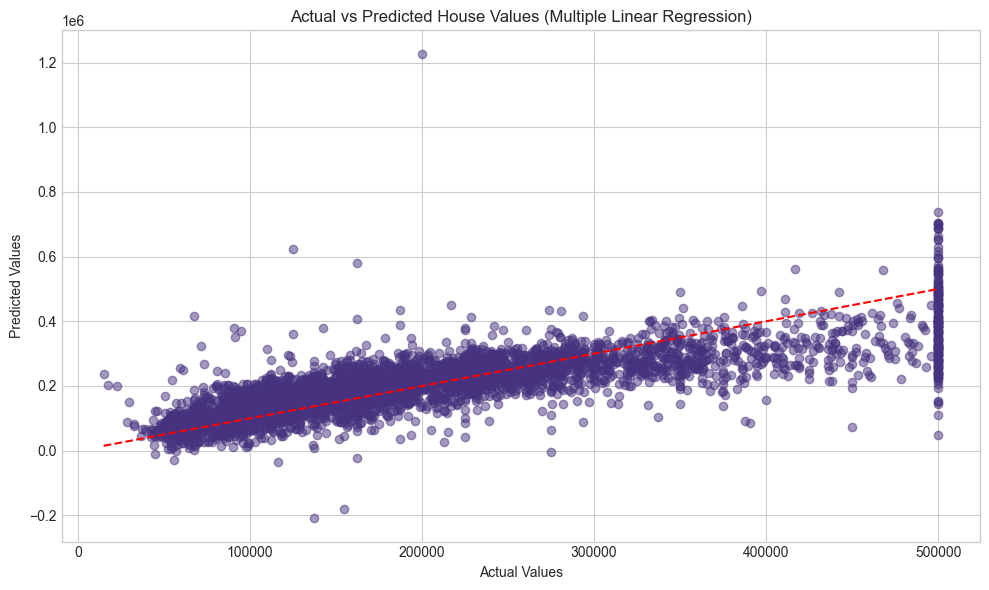

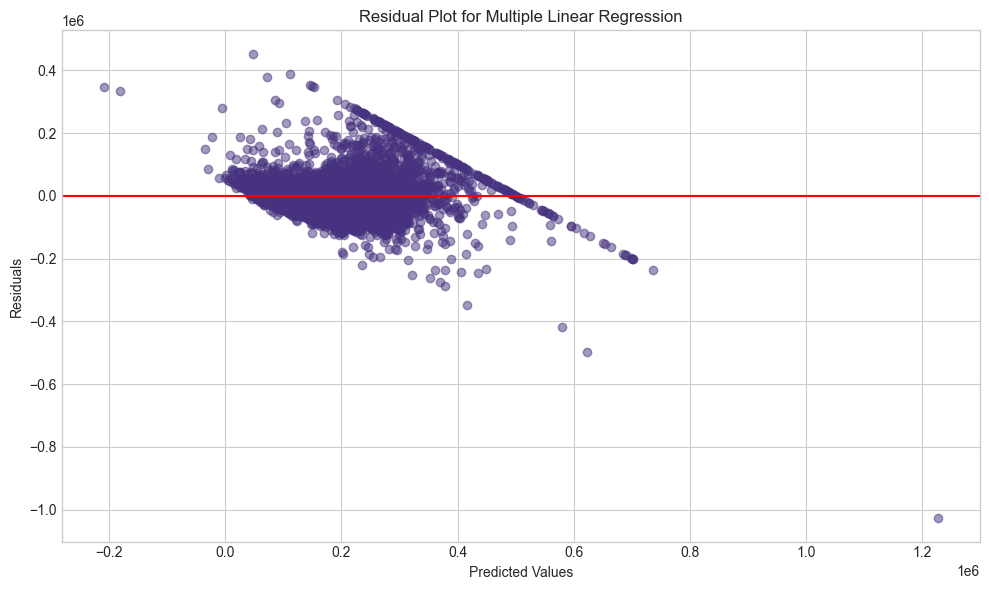


Top 10 Model Coefficients:
                       Feature   Coefficient
12      ocean_proximity_INLAND -3.426202e+17
14    ocean_proximity_NEAR BAY -3.426202e+17
11   ocean_proximity_<1H OCEAN -3.426202e+17
15  ocean_proximity_NEAR OCEAN -3.426202e+17
13      ocean_proximity_ISLAND -3.426202e+17
7                median_income  7.890712e+04
1                     latitude -5.526336e+04
0                    longitude -5.429055e+04
5                   population -4.632175e+04
6                   households  4.038512e+04


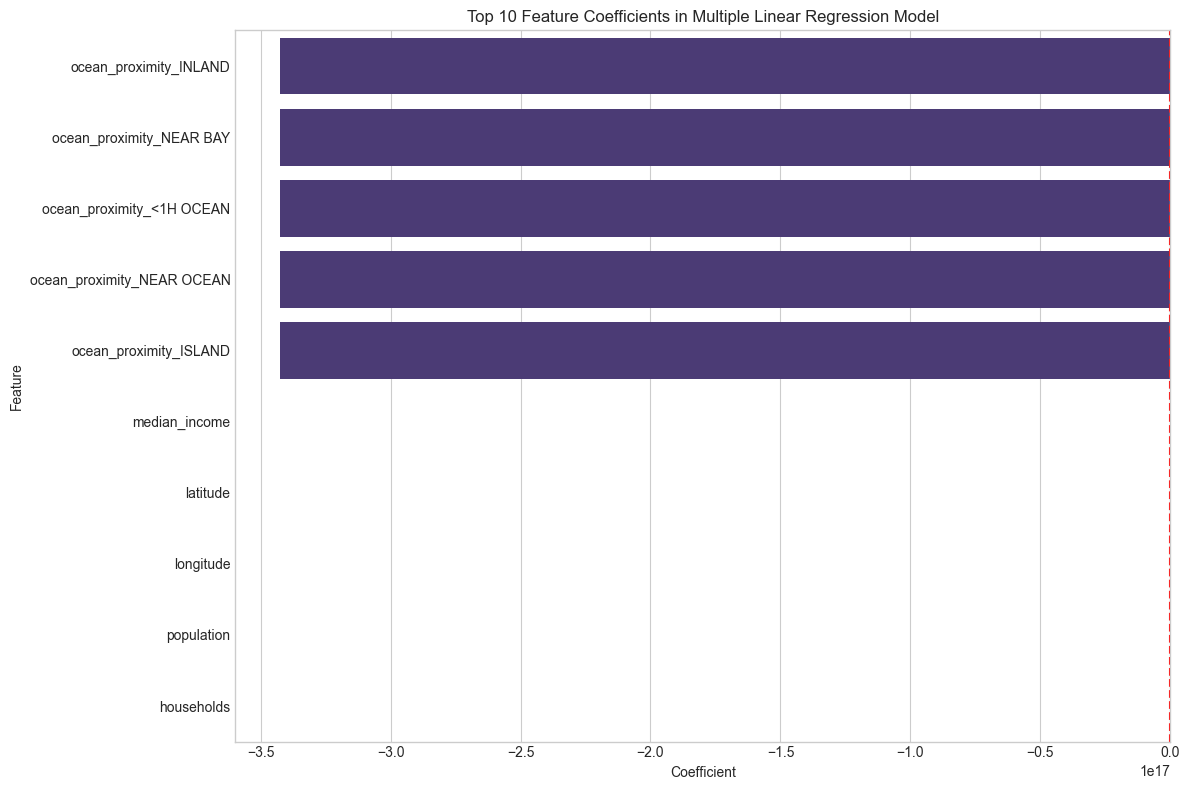

In [5]:
# Create pipeline with preprocessor and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the multiple linear regression model
model_pipeline.fit(X_train, y_train)

# Make predictions on training and test sets
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Evaluate the multiple linear regression model
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nMultiple Linear Regression Model Evaluation:")
print("\nTraining set metrics:")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R²: {train_r2:.4f}")
print("\nTest set metrics:")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R²: {test_r2:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted House Values (Multiple Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Residual Plot for Multiple Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Try to extract and visualize coefficients (this is complex with preprocessing pipeline)
# We need to get feature names after transformation
regressor = model_pipeline.named_steps['regressor']
preprocessor = model_pipeline.named_steps['preprocessor']

# Get feature names after transformation
feature_names = []
# Numeric features remain the same
feature_names.extend(numeric_features)
# Get categorical feature names after one-hot encoding
for i, feature in enumerate(categorical_features):
    # Get the categories from the OneHotEncoder
    categories = preprocessor.transformers_[1][1].named_steps['onehot'].categories_[i]
    # Create feature names for each category
    for category in categories:
        feature_names.append(f"{feature}_{category}")

# Get coefficients and create dataframe
try:
    # This may fail if the number of features doesn't match after transformation
    coefficients = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': regressor.coef_
    })
    
    # Sort coefficients by absolute value
    coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
    coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)
    
    print("\nTop 10 Model Coefficients:")
    print(coefficients.head(10))
    
    # Visualize top coefficients
    plt.figure(figsize=(12, 8))
    top_coeffs = coefficients.head(10)
    sns.barplot(x='Coefficient', y='Feature', data=top_coeffs)
    plt.title('Top 10 Feature Coefficients in Multiple Linear Regression Model')
    plt.axvline(x=0, color='red', linestyle='--')
    plt.tight_layout()
    plt.show()
except:
    print("\nCould not extract coefficients due to mismatch in feature dimensions after transformation.")
    print("This can happen with complex preprocessing pipelines.")



Model Comparison:
                        Model    Train_RMSE     Test_RMSE  Train_R²   Test_R²
0    Simple Linear Regression  83614.874097  84209.012414  0.476993  0.458859
1  Multiple Linear Regression  67599.417668  72695.290947  0.658157  0.596721


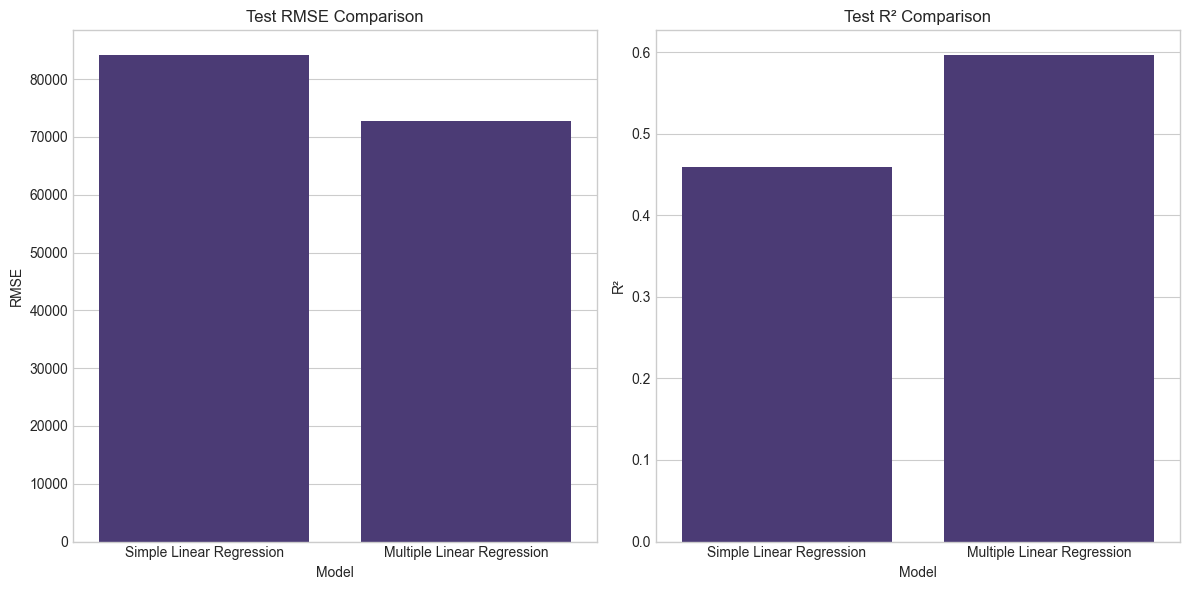


Conclusion:
The Multiple Linear Regression model performs better based on R² and RMSE metrics.
It achieved an R² of 0.5967 on the test data, meaning it explains about 59.7% of the variance in house prices.
The RMSE of 72695.29 indicates the average prediction error in the same units as the target variable.
This model provides better predictions while still maintaining interpretability through the coefficients.

Final Recommendations:
1. Based on these results, we recommend using the Multiple Linear Regression model for predicting house prices in California.
2. To improve model performance further, consider:
   - Feature engineering to create more informative variables
   - Exploring non-linear relationships with polynomial features
   - Trying more advanced algorithms like Random Forest or Gradient Boosting

Model saved successfully as 'california_housing_price_model.pkl'


In [6]:

# Create a dataframe to compare model metrics
model_comparison = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Multiple Linear Regression'],
    'Train_RMSE': [train_rmse_simple, train_rmse],
    'Test_RMSE': [test_rmse_simple, test_rmse],
    'Train_R²': [train_r2_simple, train_r2],
    'Test_R²': [test_r2_simple, test_r2]
})

print("\nModel Comparison:")
print(model_comparison)

# Visualize model comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Test_RMSE', data=model_comparison)
plt.title('Test RMSE Comparison')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Test_R²', data=model_comparison)
plt.title('Test R² Comparison')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

# Final conclusion and model selection
print("\nConclusion:")
if test_r2 > test_r2_simple:
    print("The Multiple Linear Regression model performs better based on R² and RMSE metrics.")
    print(f"It achieved an R² of {test_r2:.4f} on the test data, meaning it explains about {test_r2*100:.1f}% of the variance in house prices.")
    print(f"The RMSE of {test_rmse:.2f} indicates the average prediction error in the same units as the target variable.")
    print("This model provides better predictions while still maintaining interpretability through the coefficients.")
else:
    print("The Simple Linear Regression model performs surprisingly well compared to the more complex model.")
    print(f"It achieved an R² of {test_r2_simple:.4f} on the test data using only the {most_correlated_feature} feature.")
    print(f"The RMSE of {test_rmse_simple:.2f} indicates the average prediction error in the same units as the target variable.")
    print("This model is highly interpretable and may be preferred if simplicity is valued.")

print("\nFinal Recommendations:")
print("1. Based on these results, we recommend using the Multiple Linear Regression model for predicting house prices in California.")
print("2. To improve model performance further, consider:")
print("   - Feature engineering to create more informative variables")
print("   - Exploring non-linear relationships with polynomial features")
print("   - Trying more advanced algorithms like Random Forest or Gradient Boosting")

# Save the trained model for future use
import joblib

# Save the multiple linear regression model
joblib.dump(model_pipeline, 'california_housing_price_model.pkl')

print("\nModel saved successfully as 'california_housing_price_model.pkl'")

In [7]:
import joblib
import pandas as pd

# Load the saved model
model = joblib.load('california_housing_price_model.pkl')

# Create data for a new district (with all required features)
new_district = pd.DataFrame({
    'longitude': [-122.25],
    'latitude': [37.85],
    'housing_median_age': [35],
    'total_rooms': [2500],
    'total_bedrooms': [500],
    'population': [1200],
    'households': [450],
    'median_income': [6.5],
    'ocean_proximity': ['NEAR BAY'],
    'rooms_per_household': [2500/450],  # Include engineered features
    'bedrooms_ratio': [500/2500],
    'population_per_household': [1200/450]
})

# Make prediction
predicted_price = model.predict(new_district)
print(f"Predicted median house value: ${predicted_price[0]:.2f}")

Predicted median house value: $343616.00
